In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("Mumbai House Prices.csv")
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [4]:
print('number of rows and columns: '+ str(df.shape))

number of rows and columns: (76038, 9)


In [5]:
df.describe()

,bhk,area,price
count,76038.000000,76038.000000,76038.00000
mean,2.015111,1024.536850,29.38227
std,0.922754,670.276165,32.90345
min,1.000000,127.000000,1.00000
25%,1.000000,640.000000,1.75000
50%,2.000000,872.000000,5.50000
75%,3.000000,1179.000000,59.00000
max,10.000000,16000.000000,99.99000


In [6]:
df['price_unit'].value_counts()

price_unit
Cr    40981
L     35057
Name: count, dtype: int64

In [7]:
#Conversion of price to lakhs
#df['price'].where(condition, other)
df['price_lakhs'] = df['price'].where(df['price_unit'] == 'L', df['price'] * 100)
df1 = df.drop(['price', 'price_unit'], axis=1)
df1.head()

,bhk,type,locality,area,region,status,age,price_lakhs
0,3,Apartment,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,250.00
1,2,Apartment,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,52.51
2,2,Apartment,Romell Serene,610,Borivali West,Under Construction,New,173.00
3,2,Apartment,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,59.98
4,2,Apartment,Origin Oriana,659,Mira Road East,Under Construction,New,94.11


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bhk          76038 non-null  int64  
 1   type         76038 non-null  object 
 2   locality     76038 non-null  object 
 3   area         76038 non-null  int64  
 4   region       76038 non-null  object 
 5   status       76038 non-null  object 
 6   age          76038 non-null  object 
 7   price_lakhs  76038 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 4.6+ MB


In [9]:
print(df1['age'].value_counts())
print(df1['age'].unique())

age
New        38072
Resale     23357
Unknown    14609
Name: count, dtype: int64
['New' 'Resale' 'Unknown']


In [10]:
print(df1['type'].value_counts())
print(df1['type'].unique())

type
Apartment            74854
Studio Apartment       882
Villa                  226
Independent House       73
Penthouse                3
Name: count, dtype: int64
['Apartment' 'Villa' 'Studio Apartment' 'Independent House' 'Penthouse']


In [11]:
df1 = df1.drop(['locality'],axis=1)

In [12]:
print(df1['region'].value_counts())

region
Thane West         14868
Mira Road East      9902
Dombivali           3041
Kandivali East      2568
Kharghar            2362
                   ...  
Police Colony          1
GTB Nagar              1
Bandra                 1
Sector 14 Vashi        1
Goregaon               1
Name: count, Length: 228, dtype: int64


In [13]:
#to reduce the number of regions
num_regions = df1['region'].value_counts()
small_regions = num_regions[num_regions<=20].index.tolist()
def change_small_regions(region):
    if region in small_regions:
        return 'other'
    else:
        return region
df1['region'] = df1['region'].apply(change_small_regions)
print(df1['region'].value_counts())

region
Thane West        14868
Mira Road East     9902
Dombivali          3041
Kandivali East     2568
Kharghar           2362
                  ...  
Ambarnath            26
Umroli               25
Juinagar             24
Tardeo               23
Dombivali East       21
Name: count, Length: 104, dtype: int64


In [14]:
print(df1['status'].value_counts())
print(df1['status'].unique())

status
Ready to move         44982
Under Construction    31056
Name: count, dtype: int64
['Ready to move' 'Under Construction']


In [15]:
df1.describe()
#we can see that the area and price_lakhs has outliers since the max is much higher than 75%

,bhk,area,price_lakhs
count,76038.000000,76038.000000,76038.000000
mean,2.015111,1024.536850,168.417795
std,0.922754,670.276165,217.665511
min,1.000000,127.000000,4.490000
25%,1.000000,640.000000,64.000000
50%,2.000000,872.000000,110.000000
75%,3.000000,1179.000000,194.000000
max,10.000000,16000.000000,6000.000000


In [16]:
df1.isnull().sum()
#there is no missing data in the dataset

bhk            0
type           0
area           0
region         0
status         0
age            0
price_lakhs    0
dtype: int64

In [17]:
numerical_features = df1[['bhk', 'area', 'price_lakhs']]
categorical_features = df1[['type', 'region', 'status', 'age']]

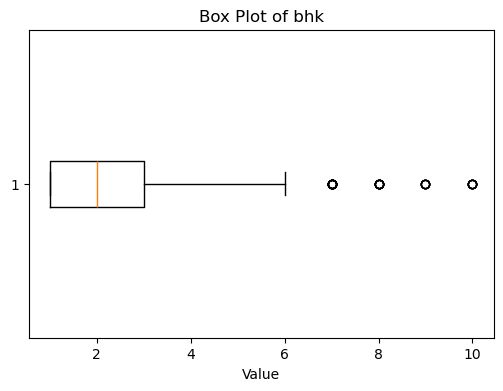

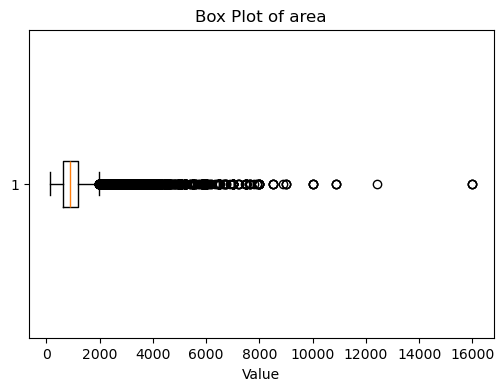

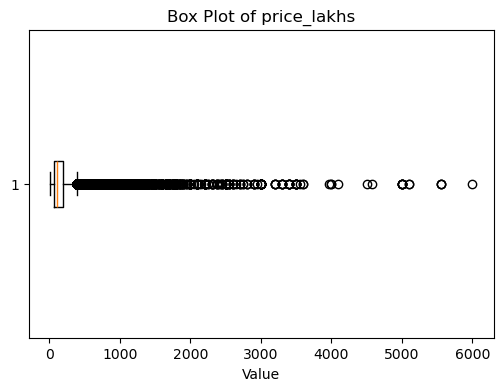

In [18]:
#to detect outliers in numerical features
for i, column in enumerate(numerical_features.columns):
    plt.figure(figsize=(6, 4))
    plt.boxplot(df1[column], vert=False, boxprops=dict())
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Value')
    plt.show()

In [19]:
#z-score method to remove outliers in area
upper_limit = df1['area'].mean() + 3*df1['area'].std()
lower_limit = df1['area'].mean() - 3*df1['area'].std()
print('upper limit: ', upper_limit)
print('lower limit: ', lower_limit)

upper limit:  3035.365344268036
lower limit:  -986.2916442759272


In [20]:
df2 = df1.copy()
df2.loc[df2['area']>upper_limit,'area']=3035
df2.loc[df2['area']<lower_limit,'area']=-986

In [21]:
#z-score method to remove outliers in price_lakhs
upper_limit = df2['price_lakhs'].mean() + 3*df2['price_lakhs'].std()
lower_limit = df2['price_lakhs'].mean() - 3*df2['price_lakhs'].std()
print('upper limit: ', upper_limit)
print('lower limit: ', lower_limit)

upper limit:  821.4143299385242
lower limit:  -484.57873904975816


In [22]:
df3 = df2.copy()
df3.loc[df3['price_lakhs']>upper_limit,'price_lakhs']=821
df2.loc[df3['price_lakhs']<lower_limit,'price_lakhs']=-484

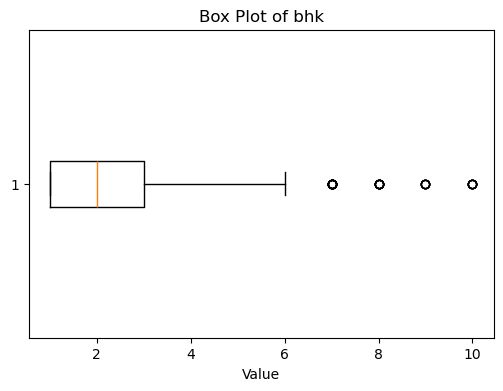

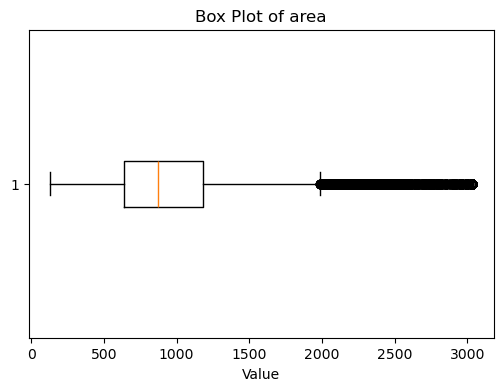

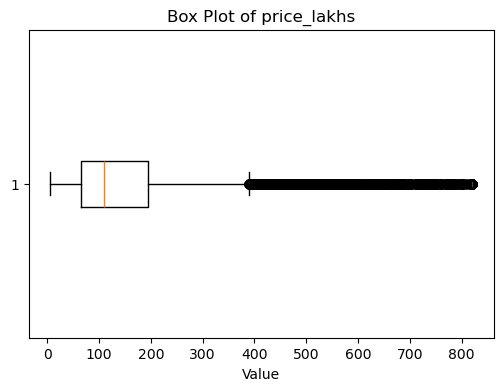

In [23]:
#to check if the outliers have been removed
for i, column in enumerate(numerical_features.columns):
    plt.figure(figsize=(6, 4))
    plt.boxplot(df3[column], vert=False, boxprops=dict())
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Value')
    plt.show()

In [24]:
df3.head()

,bhk,type,area,region,status,age,price_lakhs
0,3,Apartment,685,Andheri West,Ready to move,New,250.00
1,2,Apartment,640,Naigaon East,Under Construction,New,52.51
2,2,Apartment,610,Borivali West,Under Construction,New,173.00
3,2,Apartment,876,Panvel,Under Construction,New,59.98
4,2,Apartment,659,Mira Road East,Under Construction,New,94.11


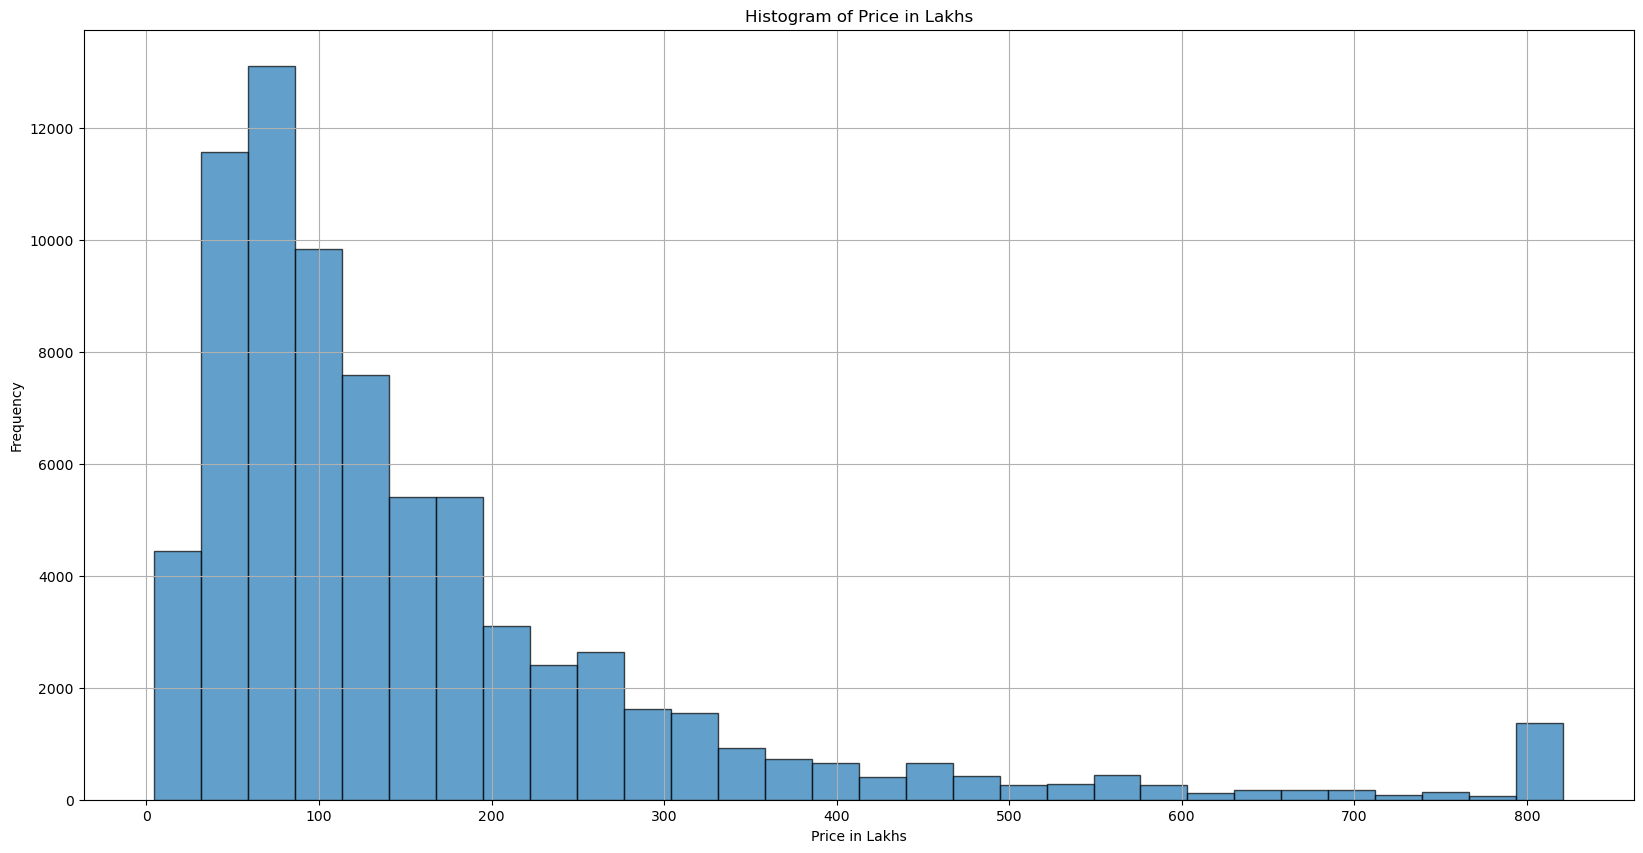

In [25]:
#To see if the price_lakhs is skewed or not
plt.hist(df3['price_lakhs'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Price in Lakhs')
plt.ylabel('Frequency')
plt.title('Histogram of Price in Lakhs')
plt.grid(True)
plt.show()

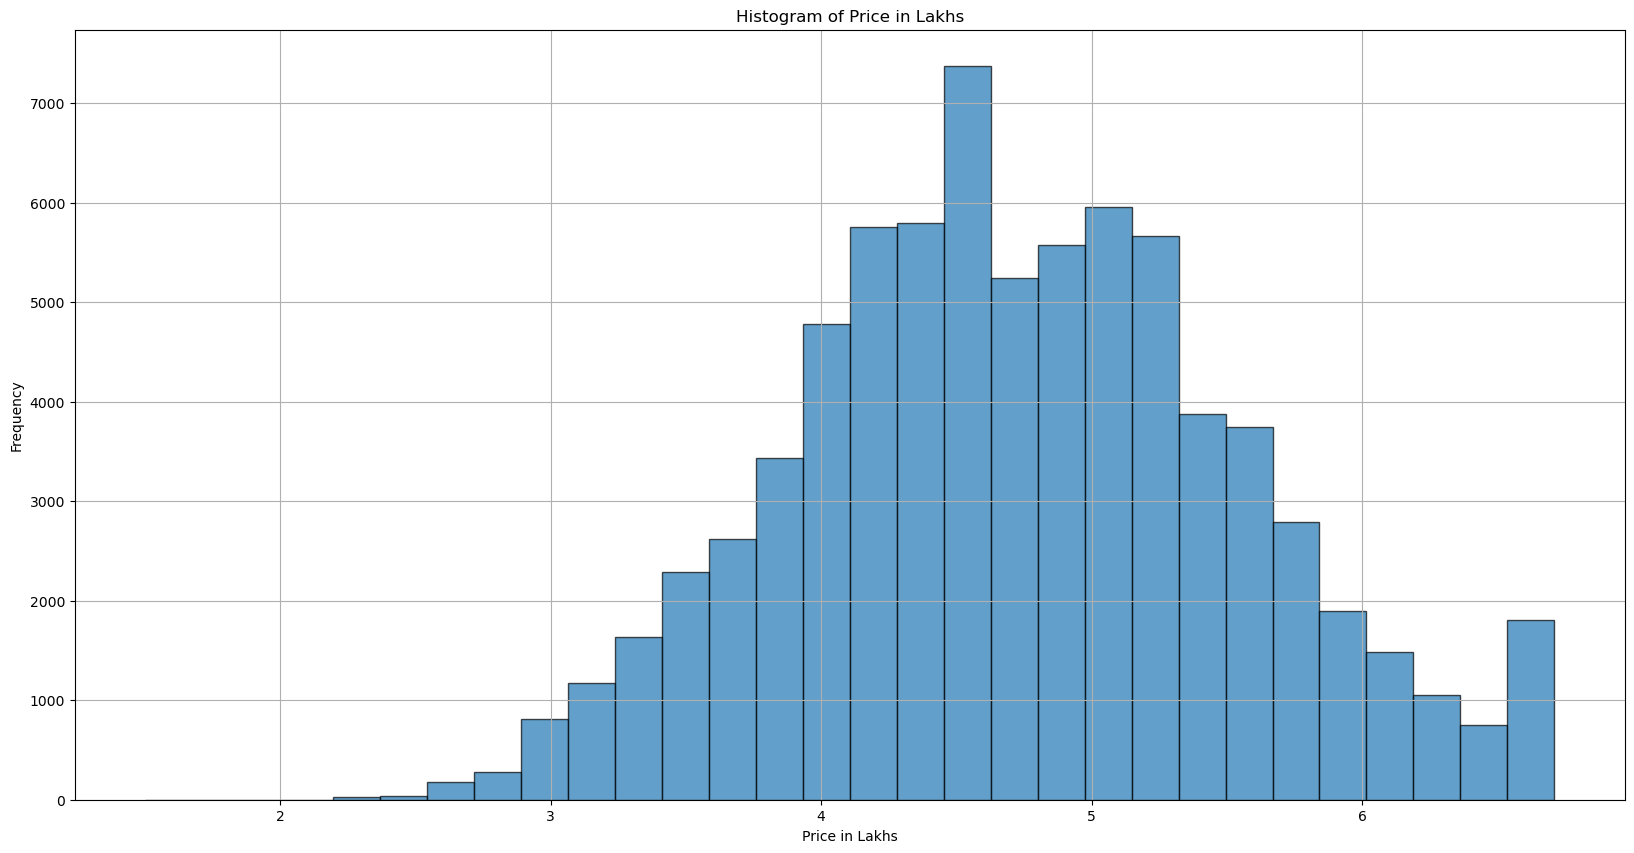

In [26]:
#We can see in the above histogram that the data is skewed so we perform log transform on it 
y_transform = np.log(df3['price_lakhs'])
plt.hist(y_transform, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Price in Lakhs')
plt.ylabel('Frequency')
plt.title('Histogram of Price in Lakhs')
plt.grid(True)
plt.show()

In [27]:
X = df3.drop(columns=['price_lakhs'],axis=1)
y = y_transform

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [29]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bhk', 'area']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['age', 'status']),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ['region', 'type'])
    ],
    remainder='passthrough'
)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR 
from sklearn.metrics import mean_absolute_error  

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

svm_model = SVR(kernel='linear', C=10)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svm', svm_model)
])

pipeline.fit(X_train, y_train)

y_pred_svr = pipeline.predict(X_test)

# Calculate mean absolute error
mae_svm = mean_absolute_error(np.exp(y_test), np.exp(y_pred_svr)) #Reverse log transformation

print("Mean Absolute Error (Linear Support Vector Machine):", mae_svm)

Mean Absolute Error (Linear Support Vector Machine): 35.366730599529255


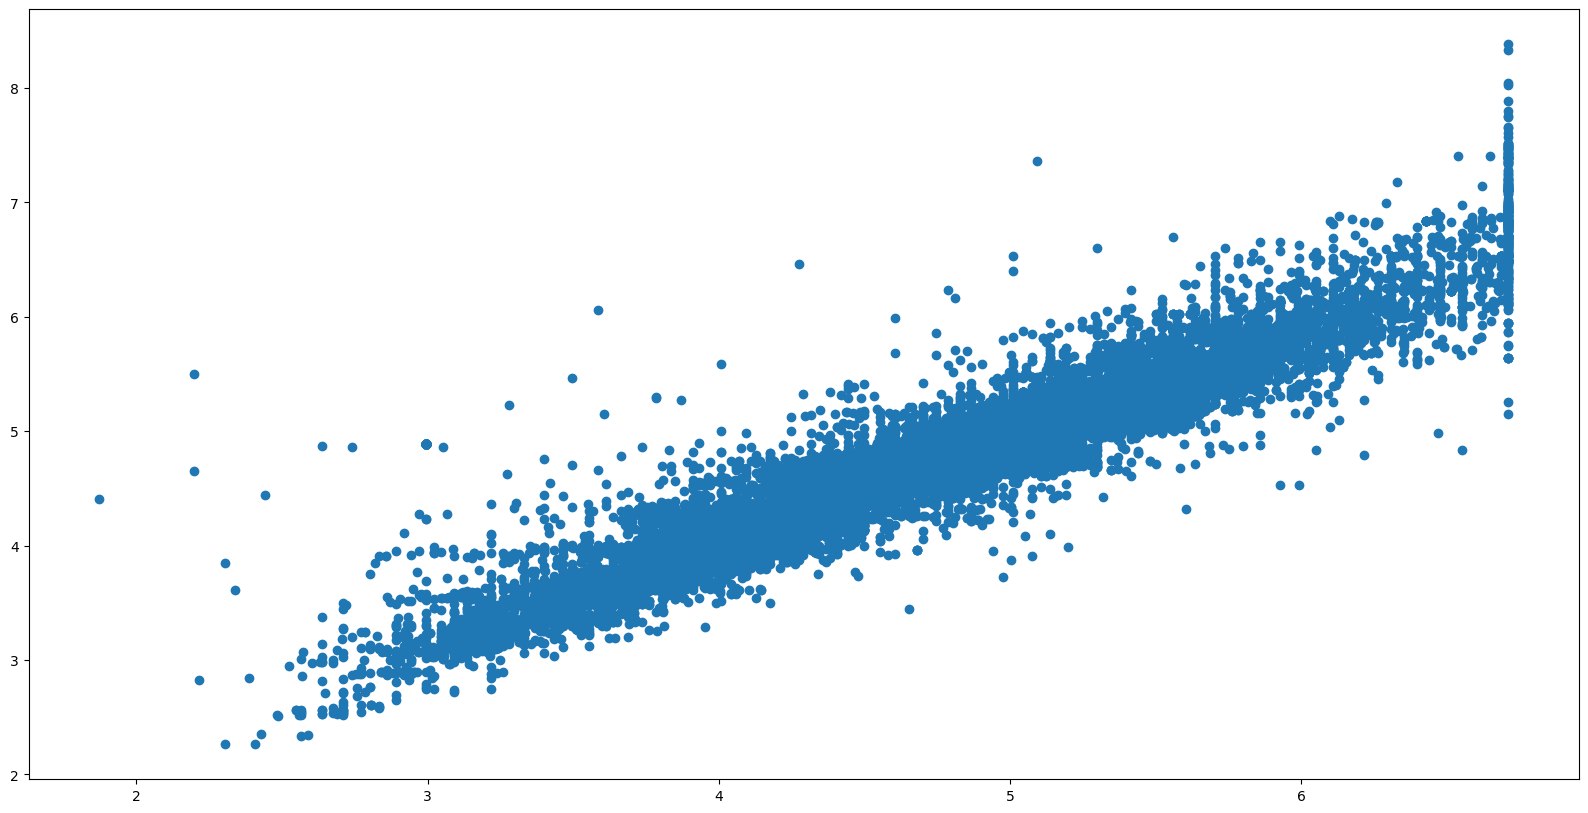

In [31]:
plt.scatter(y_test, y_pred_svr)

In [32]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet(alpha=0.001, l1_ratio=0.05)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('elasticnet', elasticnet_model)
])

pipeline.fit(X_train, y_train)

y_pred_en = pipeline.predict(X_test)

# Calculate mean absolute error
mae_en = mean_absolute_error(np.exp(y_test), np.exp(y_pred_en)) #Reverse log transformation

print("Mean Absolute Error (ElasticNet):", mae_en)

Mean Absolute Error (ElasticNet): 37.35288106893583


In [33]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', ridge_model)
])

pipeline.fit(X_train, y_train)

y_pred_ridge = pipeline.predict(X_test)

# Calculate mean absolute error
mae_ridge = mean_absolute_error(np.exp(y_test), np.exp(y_pred_ridge))  # Reverse log transformation

print("Mean Absolute Error (Ridge Regression):", mae_ridge)

Mean Absolute Error (Ridge Regression): 35.72263053933847


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', rf_model)
])

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error') 
print("Cross-Validation Mean Absolute Error (Random Forest Regression):")
print(-cv_scores.mean())

pipeline.fit(X_train, y_train)

y_pred_rf = pipeline.predict(X_test)

# Calculate mean absolute error
mae_rf = mean_absolute_error(np.exp(y_test), np.exp(y_pred_rf))  # Reverse log transformation

print("Mean Absolute Error (Random Forest Regression):", mae_rf)

Cross-Validation Mean Absolute Error (Random Forest Regression):
0.13486220821535969
Mean Absolute Error (Random Forest Regression): 21.527088769859404


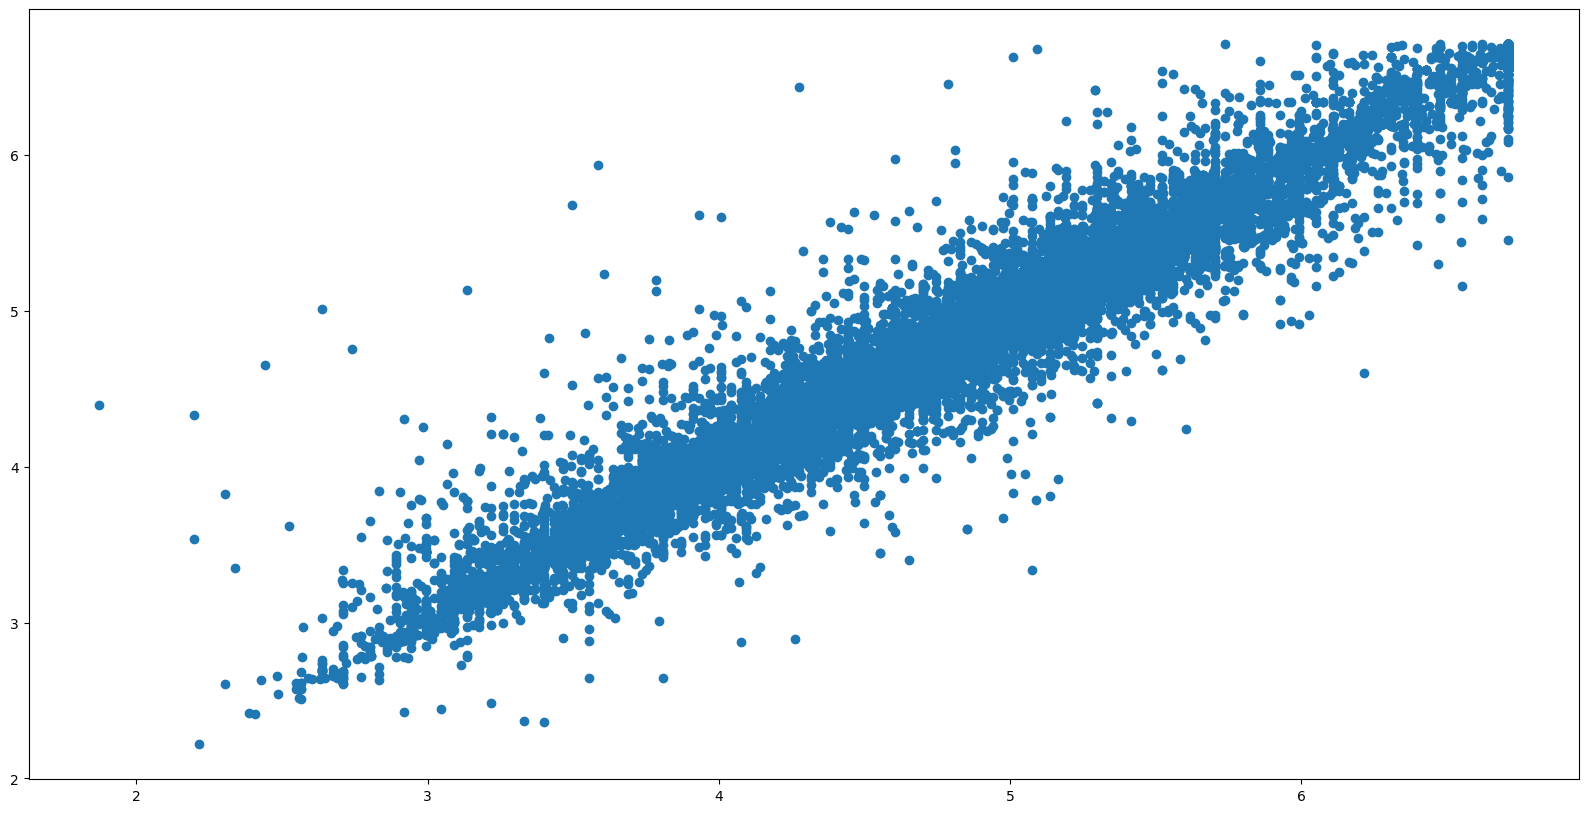

In [59]:
plt.scatter(y_test, y_pred_rf)

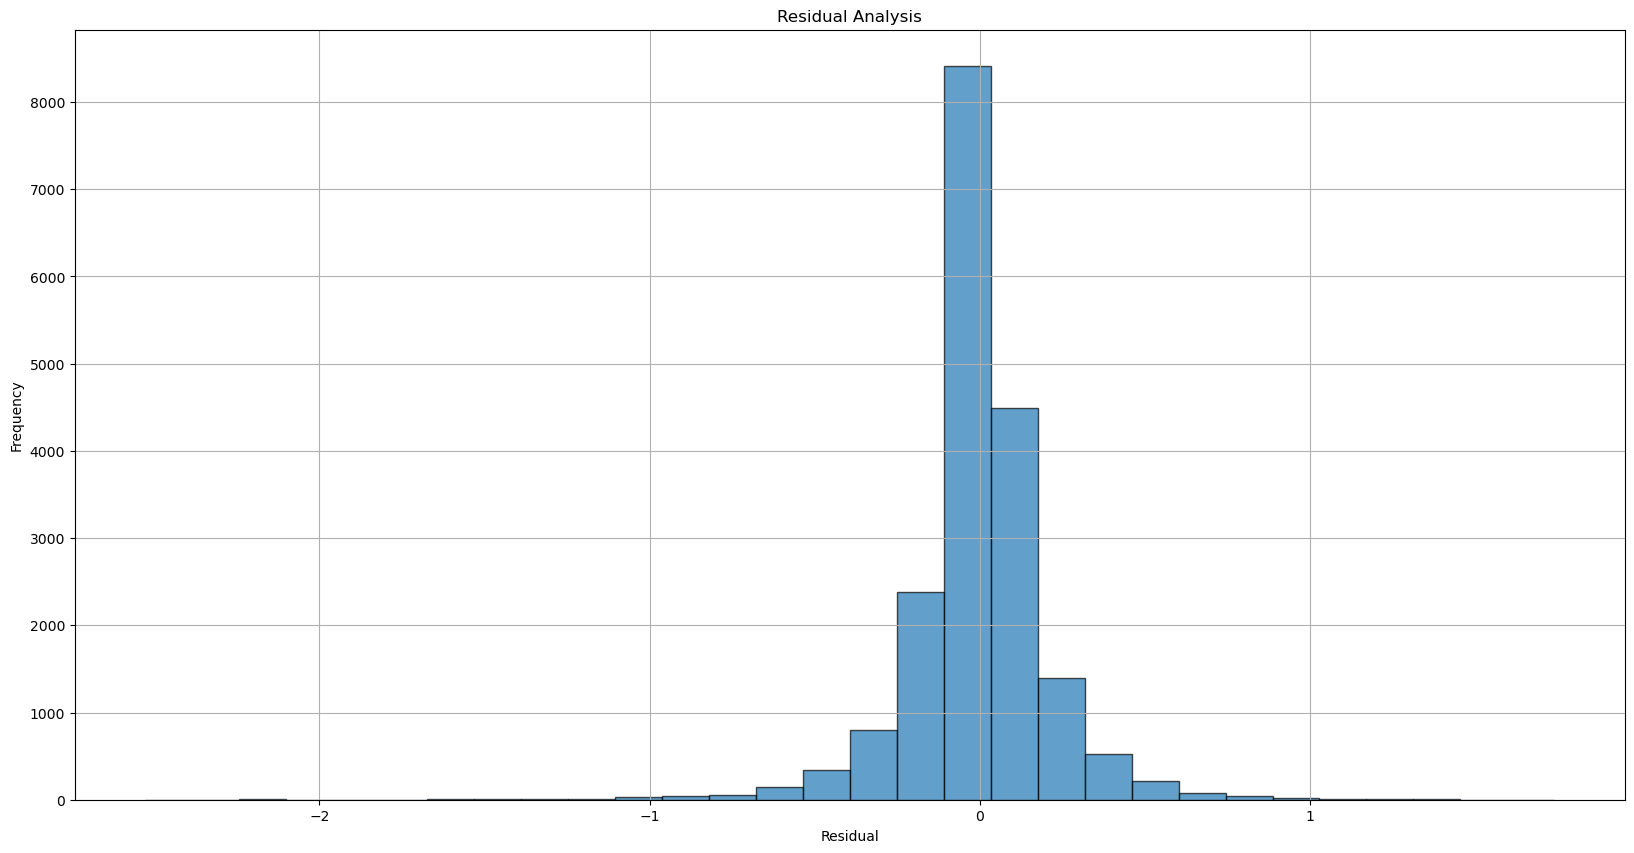

In [36]:
#residual analysis: should be centred around zero
plt.hist(y_test-y_pred_rf, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Analysis')
plt.grid(True)
plt.show()
#since the plot is centres around zero and the curve is bell shaped, our predictions are on average correct

In [43]:
# Extract text features
cats = df3.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   df3[col] = df3[col].astype('category')

df3.dtypes

bhk               int64
type           category
area              int64
region         category
status         category
age            category
price_lakhs     float64
dtype: object

In [67]:
#Using XgBoost
import xgboost as xgb

#creating x and y variables again along with train test split due to change in dtypes
X_xg = df3.drop(columns=['price_lakhs'],axis=1)
y_xg = y_transform

X_train_xg,X_test_xg,y_train_xg,y_test_xg = train_test_split(X_xg,y_xg,test_size=0.25,random_state=10)


#Creating regression matrices
dtrain = xgb.DMatrix(X_train_xg, y_train_xg, enable_categorical=True)
dtest = xgb.DMatrix(X_test_xg, y_test_xg, enable_categorical=True)

#objective is the loss function to be minimized during training
params = {"objective": "reg:squarederror", "tree_method": "hist"}

#To evaluate model performance as it is getting improved
evals = [(dtrain, "train"), (dtest, "validation")]

model = xgb.train(params=params, dtrain=dtrain, num_boost_round=260, evals=evals, verbose_eval=10) #verbose_eval=10 prints the evaluation every 10 rounds

# Predictions
y_pred_xg = model.predict(dtest)

mae_xg = mean_absolute_error(np.exp(y_test_xg), np.exp(y_pred_xg))  # Reverse log transformation

print("Mean Absolute Error (XgBoost):", mae_xg)

[0]	train-rmse:0.60283	validation-rmse:0.61016
[10]	train-rmse:0.21760	validation-rmse:0.22280
[20]	train-rmse:0.20739	validation-rmse:0.21654
[30]	train-rmse:0.20190	validation-rmse:0.21445
[40]	train-rmse:0.19659	validation-rmse:0.21219
[50]	train-rmse:0.19309	validation-rmse:0.21096
[60]	train-rmse:0.18971	validation-rmse:0.20975
[70]	train-rmse:0.18662	validation-rmse:0.20874
[80]	train-rmse:0.18403	validation-rmse:0.20805
[90]	train-rmse:0.18206	validation-rmse:0.20772
[100]	train-rmse:0.18051	validation-rmse:0.20728
[110]	train-rmse:0.17870	validation-rmse:0.20699
[120]	train-rmse:0.17716	validation-rmse:0.20683
[130]	train-rmse:0.17556	validation-rmse:0.20633
[140]	train-rmse:0.17401	validation-rmse:0.20618
[150]	train-rmse:0.17259	validation-rmse:0.20584
[160]	train-rmse:0.17122	validation-rmse:0.20559
[170]	train-rmse:0.17020	validation-rmse:0.20552
[180]	train-rmse:0.16922	validation-rmse:0.20554
[190]	train-rmse:0.16793	validation-rmse:0.20531
[200]	train-rmse:0.16681	valida

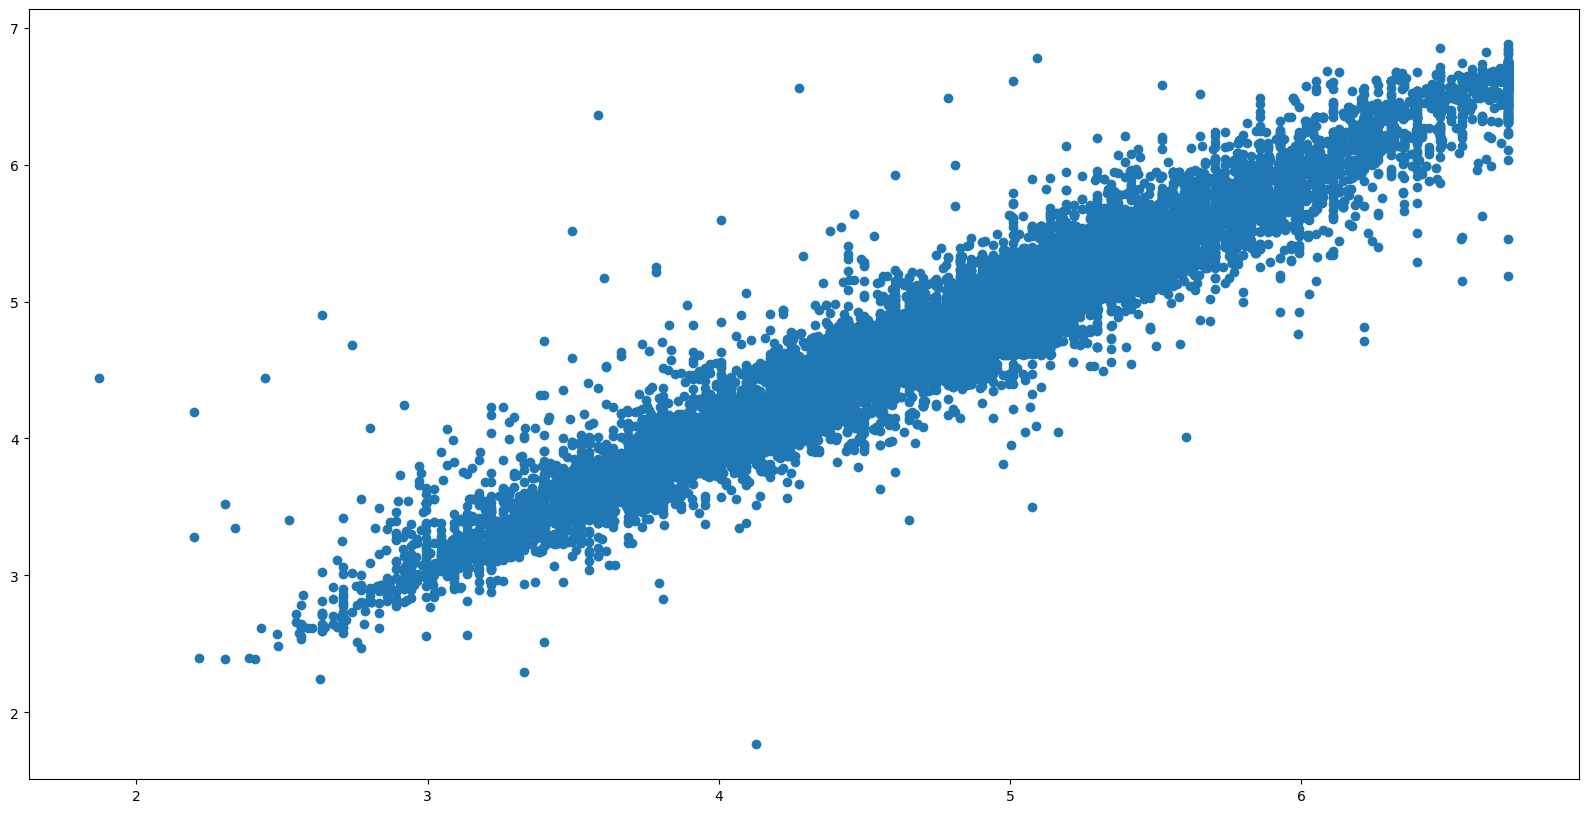

In [58]:
plt.scatter(y_test_xg, y_pred_xg)

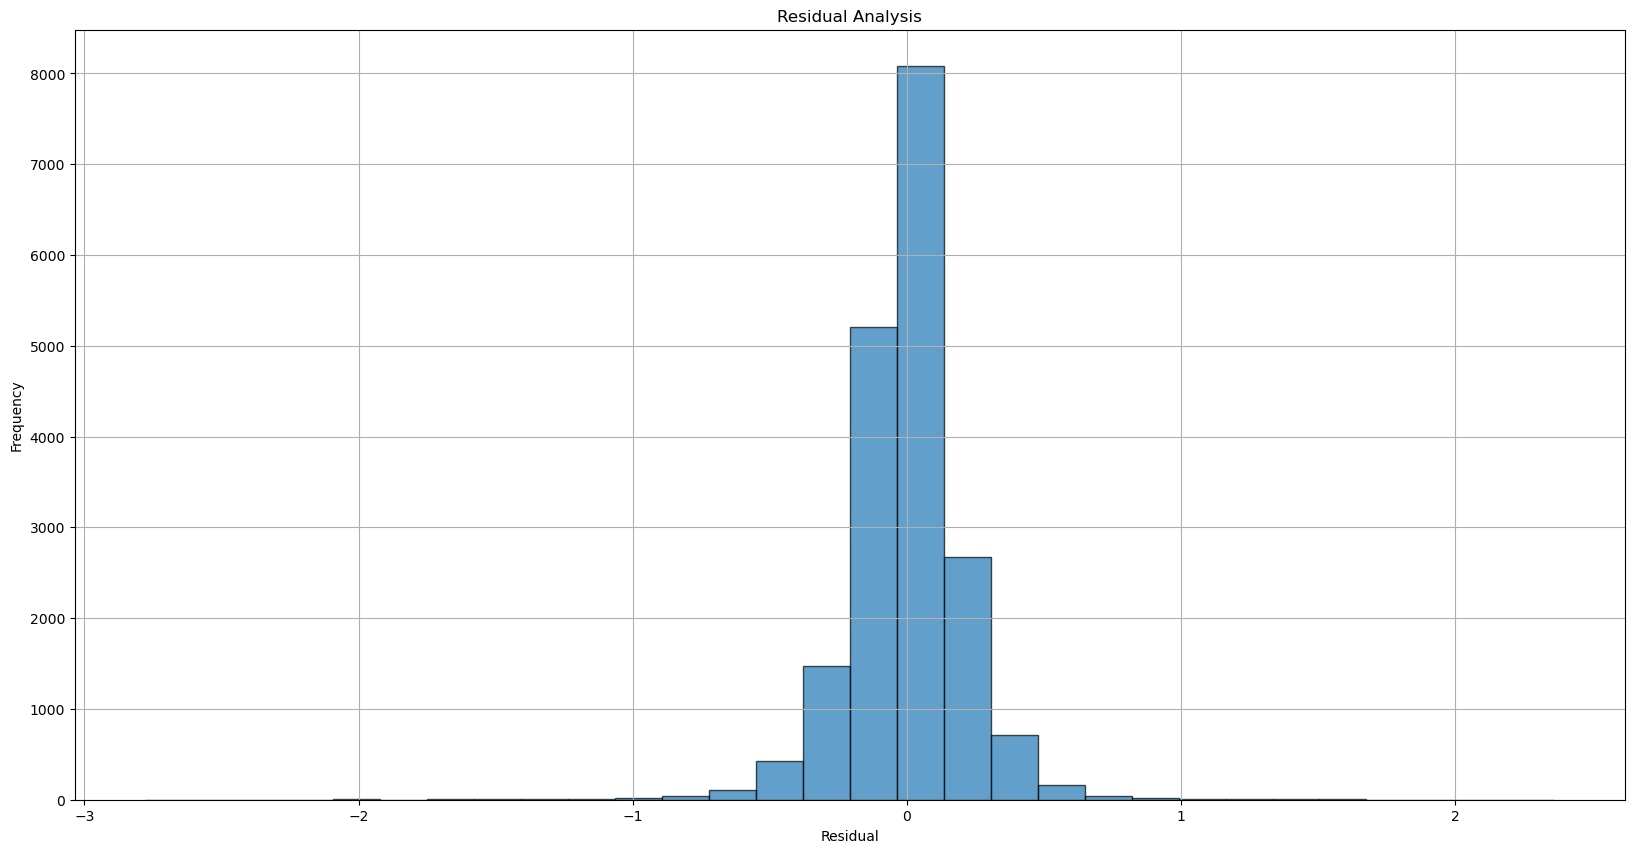

In [59]:
#residual analysis: should be centred around zero
plt.hist(y_test_xg-y_pred_xg, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Analysis')
plt.grid(True)
plt.show()

In [63]:
# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# For Random Forest model
mape_rf = mean_absolute_percentage_error(y_test_original_rf, y_pred_original_rf)
print("Mean Absolute Percentage Error (Random Forest):", mape_rf)

# For XGBoost model
mape_xg = mean_absolute_percentage_error(y_test_original_xg, y_pred_original_xg)
print("Mean Absolute Percentage Error (XGBoost):", mape_xg)


Mean Absolute Percentage Error (Random Forest): 13.911179014566638
Mean Absolute Percentage Error (XGBoost): 14.673851754150297


In [31]:
#Both the models give similar results
#Training the entire model on Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

rf_model = RandomForestRegressor(n_estimators=100, random_state=10)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', rf_model)
])


pipeline.fit(X, y)

y_pred_final = pipeline.predict(X)

# Calculate mean absolute error
mae_rf_final = mean_absolute_error(np.exp(y), np.exp(y_pred_final))  # Reverse log transformation

print("Mean Absolute Error (Random Forest Regression):", mae_rf_final)


Mean Absolute Error (Random Forest Regression): 12.262735782509688


In [32]:
df3.head()

,bhk,type,area,region,status,age,price_lakhs
0,3,Apartment,685,Andheri West,Ready to move,New,250.00
1,2,Apartment,640,Naigaon East,Under Construction,New,52.51
2,2,Apartment,610,Borivali West,Under Construction,New,173.00
3,2,Apartment,876,Panvel,Under Construction,New,59.98
4,2,Apartment,659,Mira Road East,Under Construction,New,94.11


In [50]:
X.columns

Index(['bhk', 'type', 'area', 'region', 'status', 'age'], dtype='object')

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bhk          76038 non-null  int64  
 1   type         76038 non-null  object 
 2   area         76038 non-null  int64  
 3   region       76038 non-null  object 
 4   status       76038 non-null  object 
 5   age          76038 non-null  object 
 6   price_lakhs  76038 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 4.1+ MB


In [51]:
#Making Predictions

input = [3,'Apartment',970,'Powai','Ready to move','Resale']
a = pd.DataFrame([input], columns=X.columns)
np.exp(pipeline.predict(a)[0])

262.13225862707884

In [47]:
input = [2,'Apartment',781,'Kandivali East','Under Construction','New']
a = pd.DataFrame([input], columns=X.columns)
np.exp(pipeline.predict(a)[0])

217.5030798046985

In [48]:
input = [3,'Apartment',1112,'Mulund West','Under Construction','New']
a = pd.DataFrame([input], columns=X.columns)
np.exp(pipeline.predict(a)[0])

258.69663403164446

In [54]:
import pickle
with open('mumbai_houses_price_prediction_2.pickle','wb') as f:
    pickle.dump(rf_model,f)